In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [2]:
def draw_line(coef,intercept, mi, ma):
    # For the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ration between positive and negative is 100 : 2, in the 2nd data its 100:20, in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

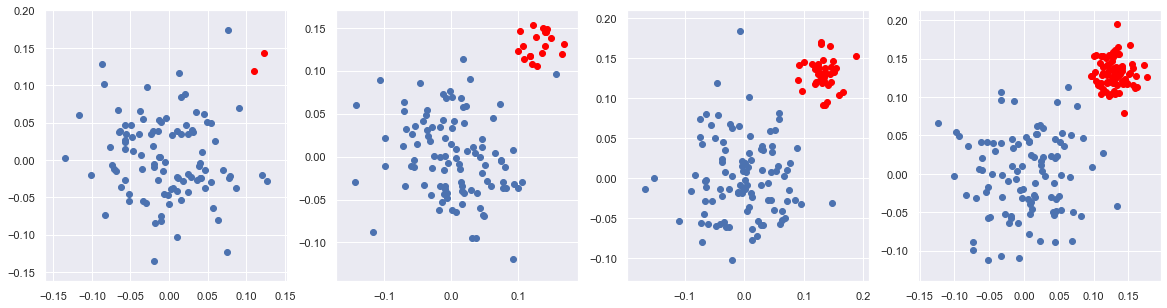

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and         jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper and atach the picture, or record a video upload it in assignment. 
</pre>

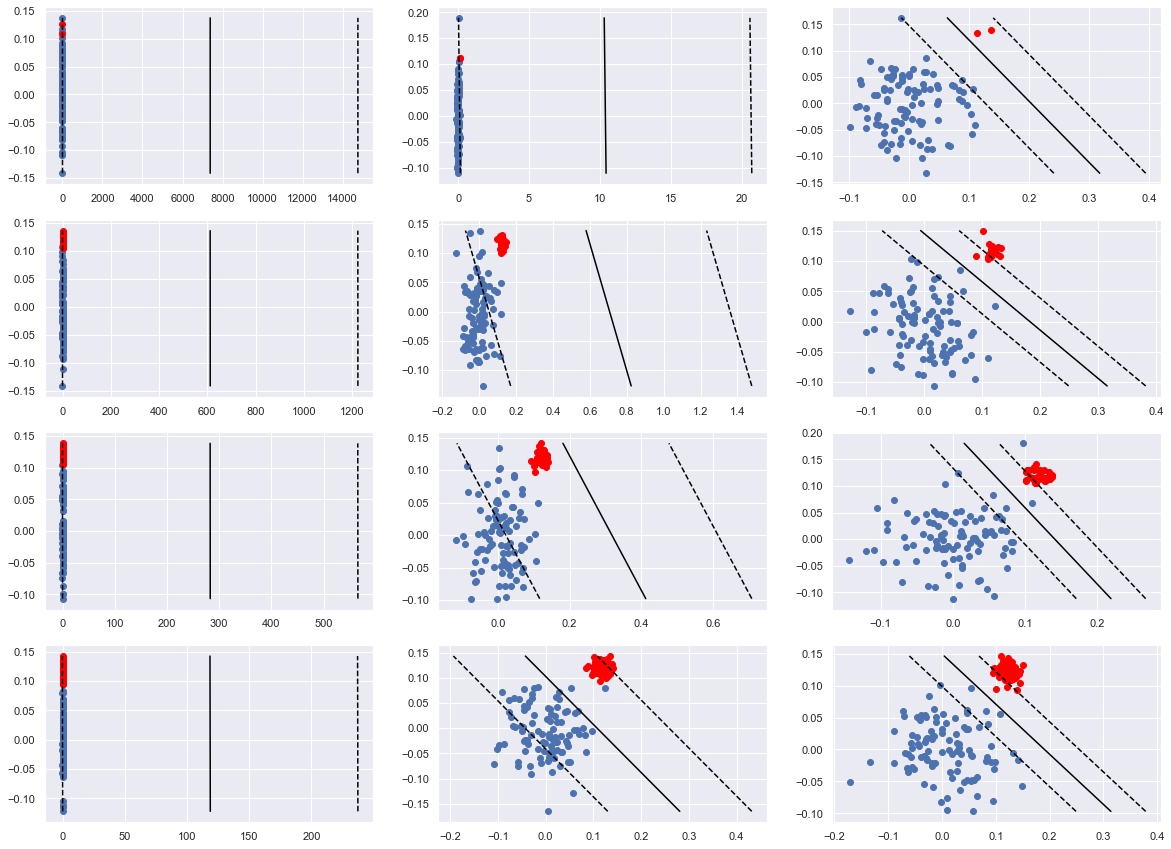

In [12]:
def draw_line(coef, intercept, mi, ma, linestyle='solid', parr=0):
    # For the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points = np.array( [ [((parr-coef[1]*mi - intercept)/coef[0]), mi],\
                         [((parr-coef[1]*ma - intercept)/coef[0]), ma] ])
    plt.plot(points[:,0], points[:,1], linestyle = linestyle, color = 'black')

def SVM_parameters(X, y, reg_param):
    classifier = SVC(gamma = 'auto', C = reg_param, kernel = 'linear')
    classifier.fit(X, y)
    return classifier.coef_[0], classifier.intercept_

reg_parameters = [0.001, 1, 100]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
k = 0
plt.figure(figsize=(20,15))

for j,i in enumerate(ratios):
    for param in reg_parameters:
        plt.subplot(4, 3, k+1)
        X_1=np.random.normal(loc = 0, scale = 0.05,size=(i[0],2))
        y_1=np.array([1]*i[0]).reshape(-1,1)
        
        X_2=np.random.normal(0.12,0.01,size=(i[1],2))
        y_2=np.array([0]*i[1]).reshape(-1,1)
        
        X=np.vstack((X_1,X_2))
        y=np.vstack((y_1,y_2))

        coeff, intercept = SVM_parameters(X,y,param)
        draw_line(coeff,intercept,min(X[:,1]),max(X[:,1]),linestyle='dashed',parr=1)
        draw_line(coeff,intercept,min(X[:,1]),max(X[:,1]))
        draw_line(coeff,intercept,min(X[:,1]),max(X[:,1]),linestyle='dashed',parr=-1)
        plt.scatter(X_1[:,0],X_1[:,1])
        plt.scatter(X_2[:,0],X_2[:,1],color='red')
        k += 1
plt.show()

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

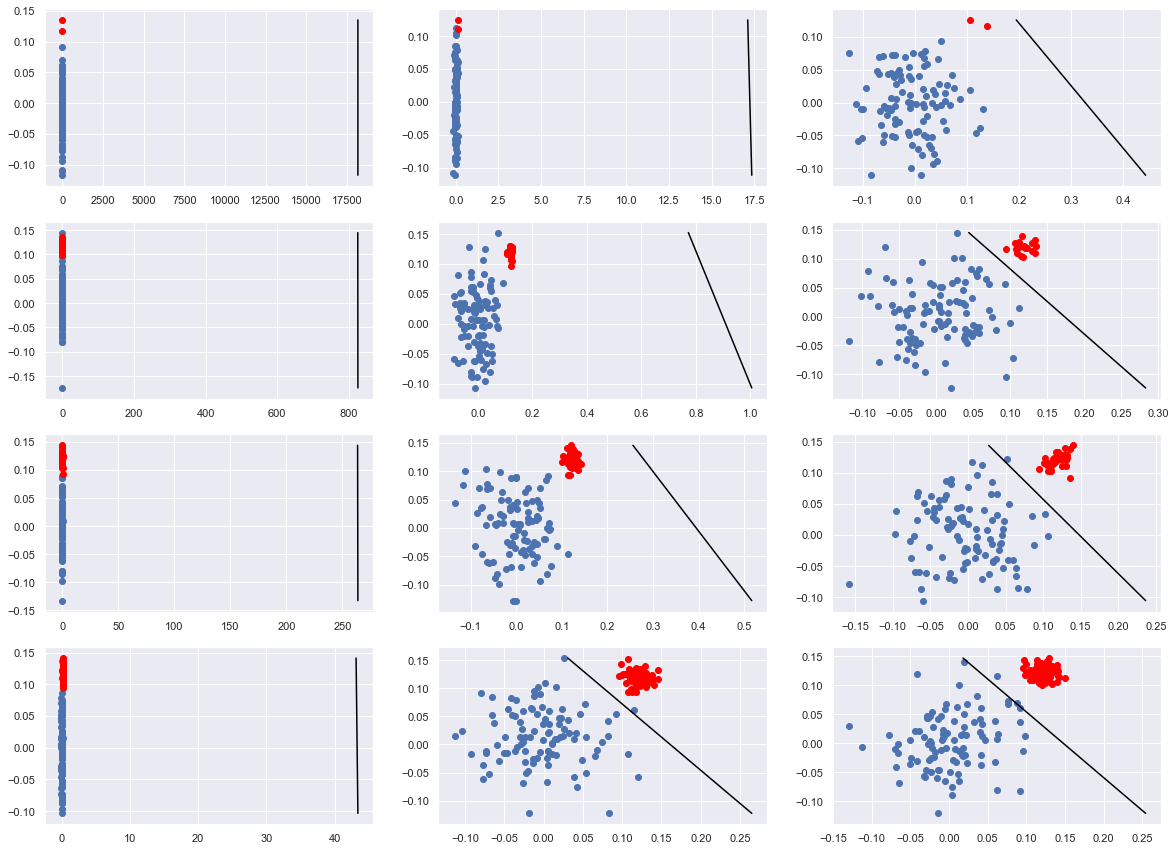

In [15]:
def draw_line(coef, intercept, mi, ma):
    # For the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1], linestyle='solid', color='black')

def LR_parameters(X, y, reg_param):
    classifier = LogisticRegression(random_state=0, C = reg_param)
    classifier.fit(X, y)
    return classifier.coef_[0], classifier.intercept_

reg_parameters = [0.001, 1, 100]
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
k = 0
plt.figure(figsize=(20,15))

for j,i in enumerate(ratios):
    for param in reg_parameters:
        plt.subplot(4, 3, k+1)
        X_1=np.random.normal(loc = 0, scale = 0.05,size=(i[0],2))
        y_1=np.array([1]*i[0]).reshape(-1,1)
        
        X_2=np.random.normal(0.12,0.01,size=(i[1],2))
        y_2=np.array([0]*i[1]).reshape(-1,1)
        
        X=np.vstack((X_1,X_2))
        y=np.vstack((y_1,y_2))

        coeff, intercept = LR_parameters(X,y,param)
        draw_line(coeff,intercept,min(X[:,1]),max(X[:,1]))
        plt.scatter(X_1[:,0],X_1[:,1])
        plt.scatter(X_2[:,0],X_2[:,1],color='red')
        k += 1
plt.show()

Summary:-
 1. For highly imbalanced datasets to almost balanced datasets, low value of regularization parameters(or C) shows poor 
    performance and thus leads to underfitting.
 
 2. For highly to moderately imbalanced datasets, even moderate values of regularization parameters(or C) do not          
    leads to better performances whereas for almost balanced datasets the performance seems better.
   
 3. For highly imbalanced datasets, high value of regularization parameters(or C) do not leads to better performances  
    but for moderately imbalanced datasets to almost balanced datasets the performance seems better seems great and thus   
    leads to overfitting.
    
 4. Logistic regression and SVM have similar performance but depending on our features, one may be more efficient than the 
    other.
  